<a href="https://colab.research.google.com/github/umarmahmoud/FinanceReportDashboard/blob/main/Random_forest_to_predict_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Train a random forest classifier to predict churn and Evaluate the predictions using evaluation metrics to demonstrate how accurately the model has performed

Here is all the data you need:
"data_for_predictions.csv"

## Data loading

### Subtask:
Load the data from "data_for_predictions.csv" into a pandas DataFrame.


**Reasoning**:
Load the data from "data_for_predictions.csv" into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd
df = pd.read_csv('data_for_predictions.csv')
display(df.head())

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify missing values, and examine the distribution of features. Determine the target variable ("churn") and relevant features.


**Reasoning**:
Explore the dataset by examining its shape, data types, missing values, and the distribution of the target variable and key features.



DataFrame shape: (14606, 64)

Data Types:
Unnamed: 0                                      int64
id                                             object
cons_12m                                      float64
cons_gas_12m                                  float64
cons_last_month                               float64
                                               ...   
channel_lmkebamcaaclubfxadlmueccxoimlema        int64
channel_usilxuppasemubllopkaafesmlibmsdf        int64
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws      int64
origin_up_ldkssxwpmemidmecebumciepifcamkci      int64
origin_up_lxidpiddsbxsbosboudacockeimpuepw      int64
Length: 64, dtype: object

Missing Values:
Unnamed: 0                                    0
id                                            0
cons_12m                                      0
cons_gas_12m                                  0
cons_last_month                               0
                                             ..
channel_lmkebamcaaclubfxadlmueccx

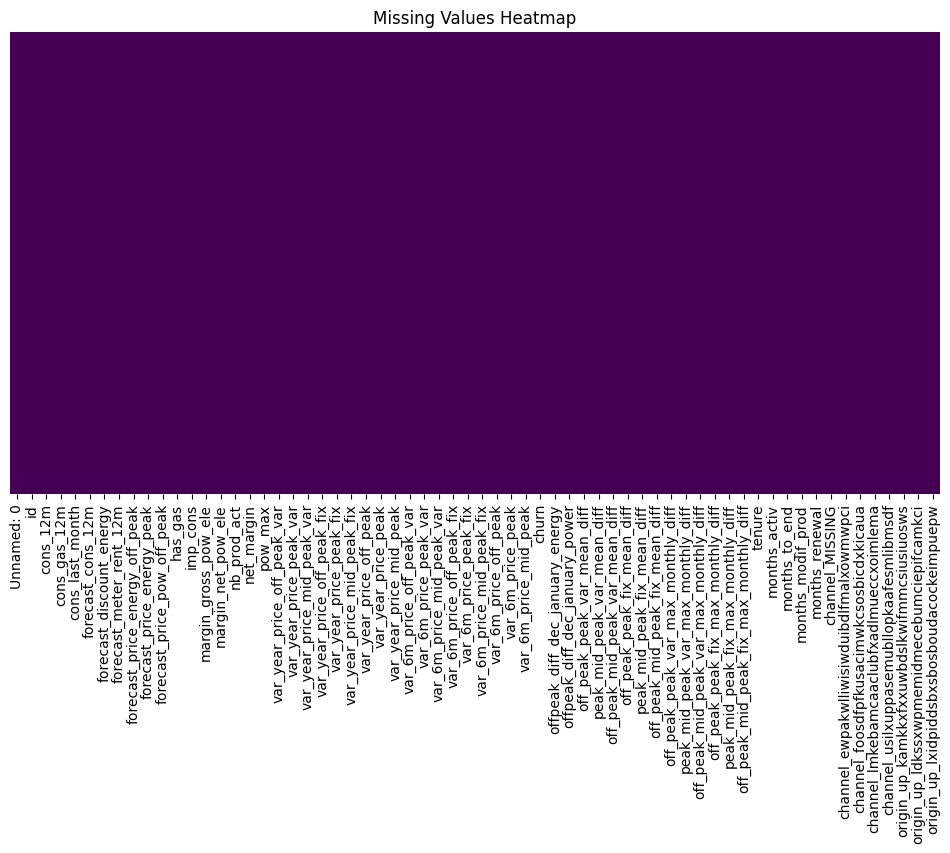

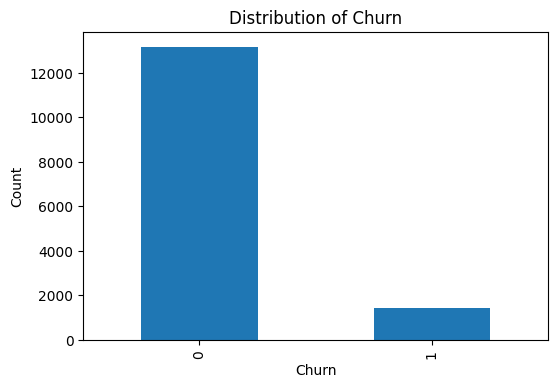

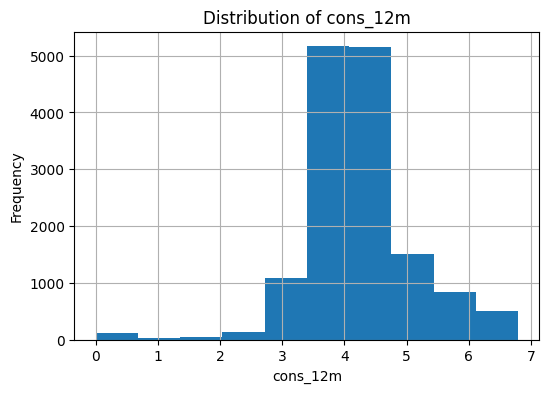

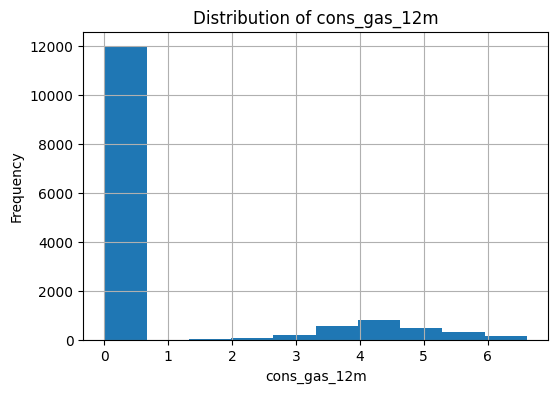

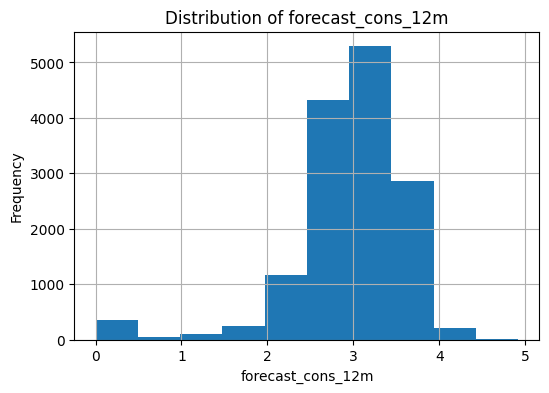

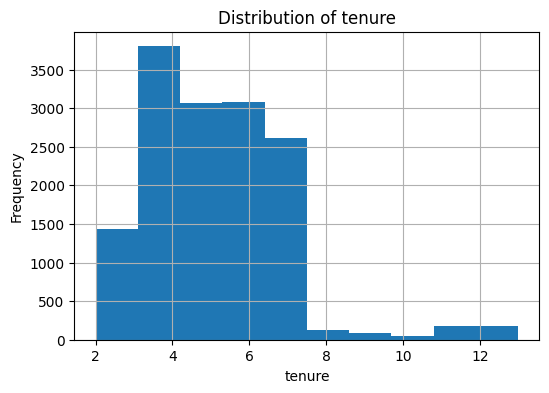

ValueError: could not convert string to float: '24011ae4ebbe3035111d65fa7c15bc57'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine the shape of the DataFrame
print(f"DataFrame shape: {df.shape}")

# 2. Identify data types
print("\nData Types:")
print(df.dtypes)

# 3. Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:")
print(missing_values)
print("\nMissing Value Percentage:")
print(missing_percentage)

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# 4. Analyze the distribution of the target variable 'churn'
plt.figure(figsize=(6, 4))
df['churn'].value_counts().plot(kind='bar')
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# 5. Explore distributions of key numerical features (example: 'cons_12m', 'cons_gas_12m')
numerical_features = ['cons_12m', 'cons_gas_12m', 'forecast_cons_12m', 'tenure']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    df[feature].hist()
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# 6. Investigate relationships between numerical features and the target variable
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['churn']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with Churn")
plt.show()


# 7. Examine categorical features (example: 'has_gas', 'channel_MISSING')
categorical_features = ['has_gas', 'channel_MISSING'] # Add more if needed
for feature in categorical_features:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=feature, hue='churn', data=df)
  plt.title(f'Distribution of {feature} by Churn')
  plt.show()

**Reasoning**:
The previous code failed due to a `ValueError` when calculating the correlation matrix because the 'id' column is of object type (string).  I need to exclude non-numeric columns from the correlation calculation. Also, there are some issues in the plotting code. I'll fix this error and improve the plots.



DataFrame shape: (14606, 64)

Data Types:
Unnamed: 0                                      int64
id                                             object
cons_12m                                      float64
cons_gas_12m                                  float64
cons_last_month                               float64
                                               ...   
channel_lmkebamcaaclubfxadlmueccxoimlema        int64
channel_usilxuppasemubllopkaafesmlibmsdf        int64
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws      int64
origin_up_ldkssxwpmemidmecebumciepifcamkci      int64
origin_up_lxidpiddsbxsbosboudacockeimpuepw      int64
Length: 64, dtype: object

Missing Values:
Unnamed: 0                                    0
id                                            0
cons_12m                                      0
cons_gas_12m                                  0
cons_last_month                               0
                                             ..
channel_lmkebamcaaclubfxadlmueccx

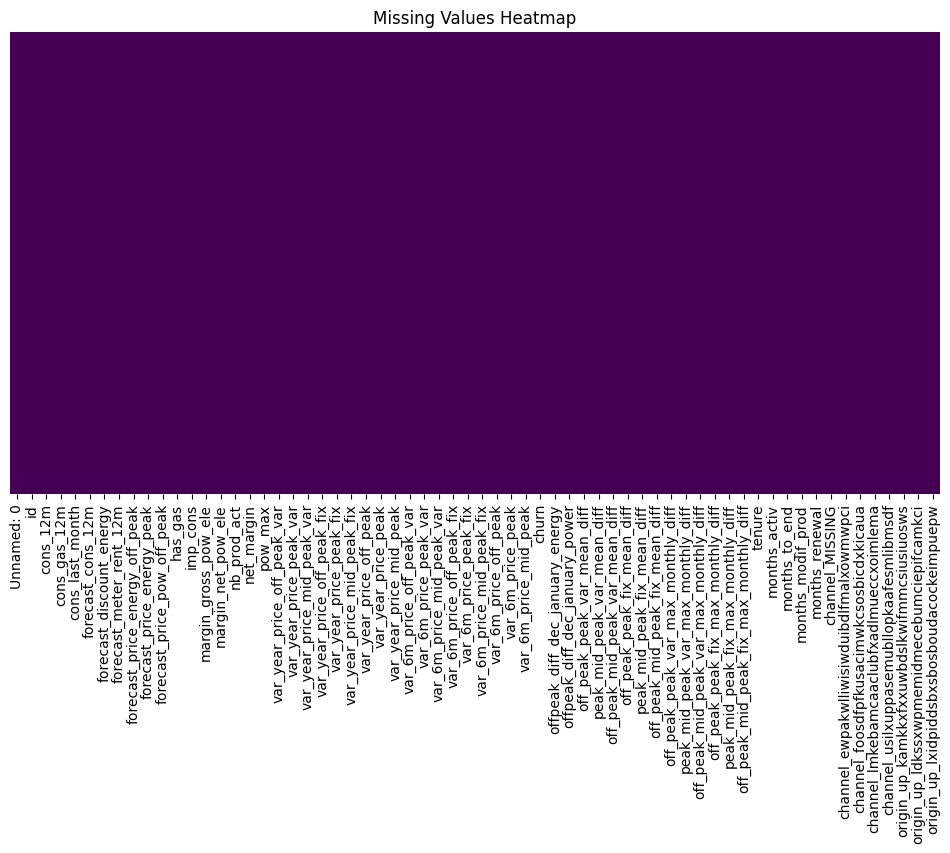

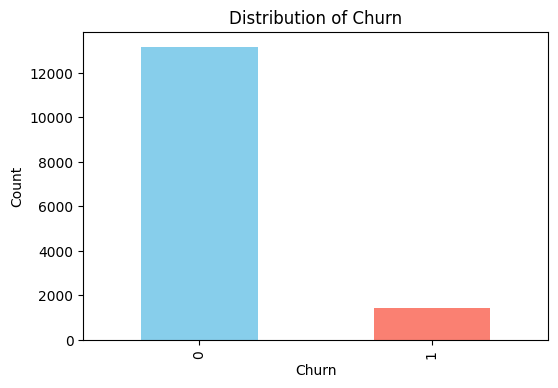

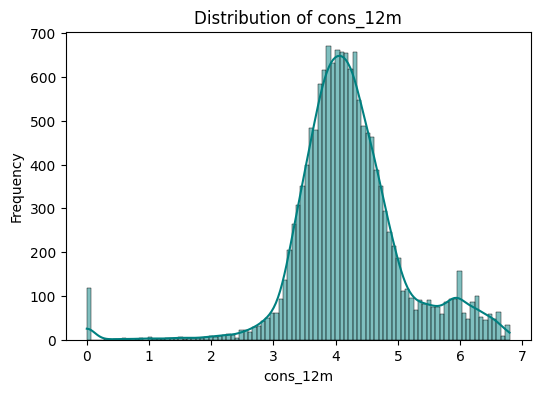

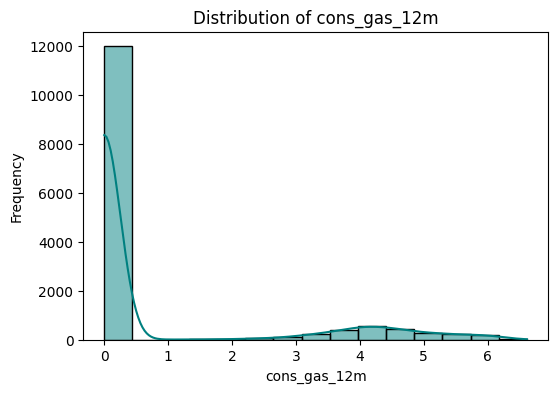

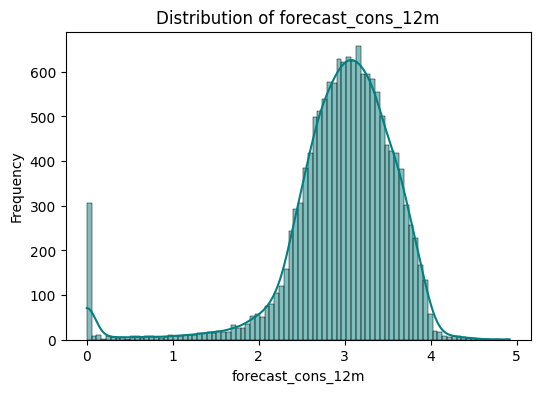

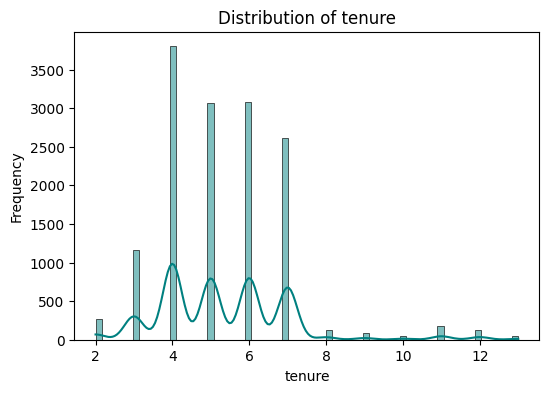

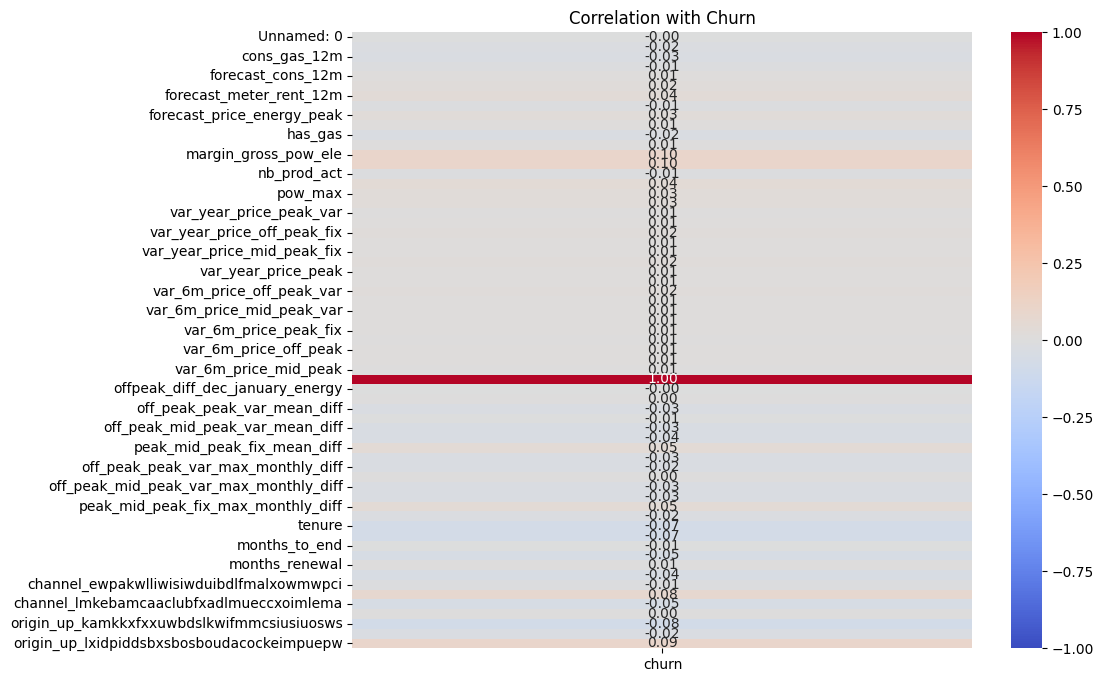

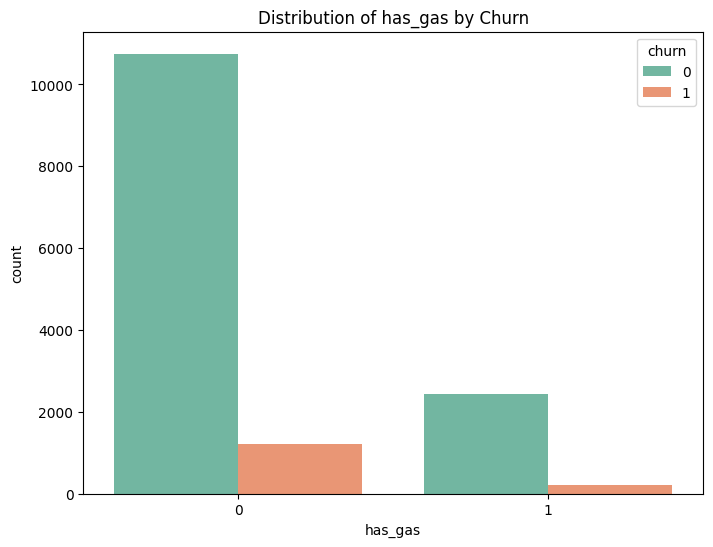

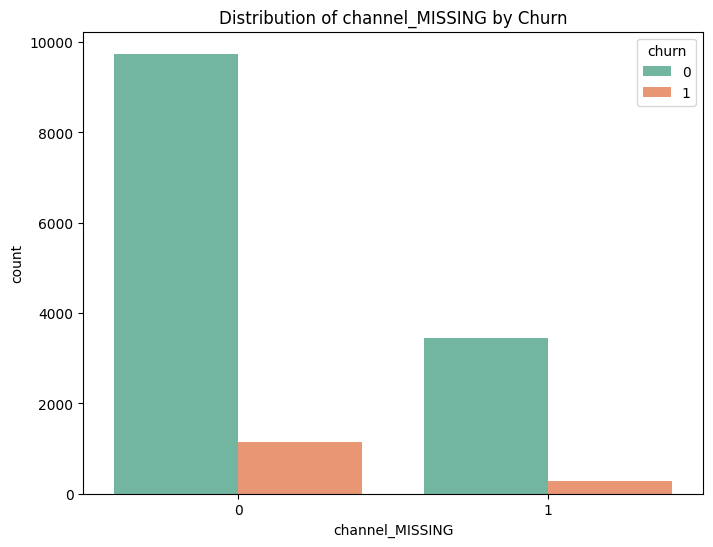

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine the shape of the DataFrame
print(f"DataFrame shape: {df.shape}")

# 2. Identify data types
print("\nData Types:")
print(df.dtypes)

# 3. Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:")
print(missing_values)
print("\nMissing Value Percentage:")
print(missing_percentage)

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# 4. Analyze the distribution of the target variable 'churn'
plt.figure(figsize=(6, 4))
df['churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# 5. Explore distributions of key numerical features
numerical_features = ['cons_12m', 'cons_gas_12m', 'forecast_cons_12m', 'tenure']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, color='teal') # Use seaborn histplot
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


# 6. Investigate relationships between numerical features and the target variable
numeric_df = df.select_dtypes(include=['number']) # Select only numeric columns
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['churn']], annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation with Churn")
plt.show()


# 7. Examine categorical features
categorical_features = ['has_gas', 'channel_MISSING']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='churn', data=df, palette="Set2")
    plt.title(f'Distribution of {feature} by Churn')
    plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values, outliers, and encoding categorical features.


**Reasoning**:
Check for missing values and handle them if any exist. Then, identify and handle outliers in numerical features. Finally, encode categorical features using one-hot encoding.



In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# No missing values found in the initial exploration, but double-checking here.

# Outlier handling (example using IQR for 'cons_12m')
numerical_features = ['cons_12m', 'cons_gas_12m', 'forecast_cons_12m', 'tenure']
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)


# Categorical feature encoding using one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Data Validation: Check data types and missing values after cleaning
print("\nData Types after cleaning:\n", df.dtypes)
missing_values_after_cleaning = df.isnull().sum()
print("\nMissing Values after cleaning:\n", missing_values_after_cleaning)

Missing Values:
 Unnamed: 0                                    0
id                                            0
cons_12m                                      0
cons_gas_12m                                  0
cons_last_month                               0
                                             ..
channel_lmkebamcaaclubfxadlmueccxoimlema      0
channel_usilxuppasemubllopkaafesmlibmsdf      0
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws    0
origin_up_ldkssxwpmemidmecebumciepifcamkci    0
origin_up_lxidpiddsbxsbosboudacockeimpuepw    0
Length: 64, dtype: int64

Data Types after cleaning:
 Unnamed: 0                               int64
cons_12m                               float64
cons_gas_12m                           float64
cons_last_month                        float64
forecast_cons_12m                      float64
                                        ...   
id_ffebf6a979dd0b17a41076df1057e733       bool
id_fffac626da707b1b5ab11e8431a4d0a2       bool
id_fffc0cacd305dd51f31642

## Feature engineering

### Subtask:
Engineer new features to improve model performance.


**Reasoning**:
Engineer new features based on interactions, transformations, and derivations from existing features, then evaluate their impact on the target variable 'churn'.



,churn
cons_forecast_diff,-0.024374
cons_gas_ratio,NaN
price_energy_ratio,0.035083
log_cons_12m,-0.011211
sqrt_tenure,-0.080437
net_margin,-0.009609


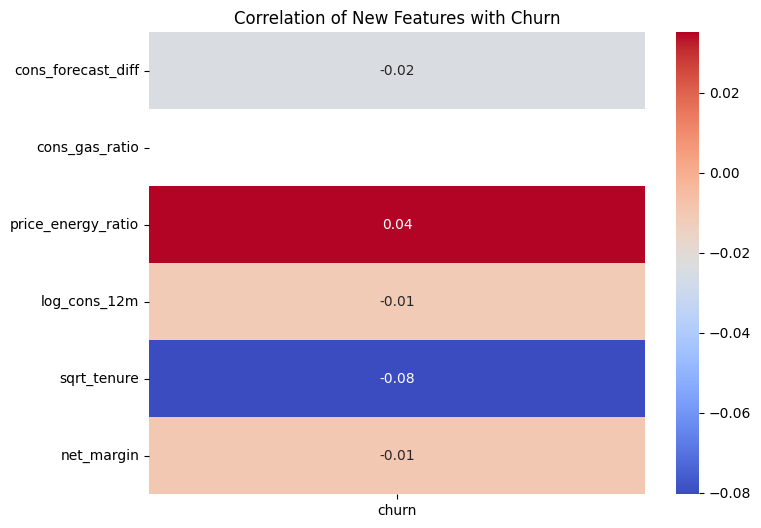

In [5]:
import numpy as np

# 1. Interaction terms
df['cons_forecast_diff'] = df['cons_12m'] - df['forecast_cons_12m']
df['cons_gas_ratio'] = np.where(df['cons_gas_12m'] != 0, df['cons_12m'] / df['cons_gas_12m'], 0)
df['price_energy_ratio'] = np.where(df['forecast_price_energy_off_peak'] != 0,
                                    df['forecast_price_energy_peak'] / df['forecast_price_energy_off_peak'], 0)


# 2. Numerical feature transformations
df['log_cons_12m'] = np.log1p(df['cons_12m'])
df['sqrt_tenure'] = np.sqrt(df['tenure'])


# 3. Feature derivation
df['net_margin'] = df['forecast_meter_rent_12m'] - df['forecast_price_pow_off_peak']

# Evaluate the impact of new features (Correlation with 'churn')
numerical_features = ['cons_forecast_diff', 'cons_gas_ratio', 'price_energy_ratio',
                      'log_cons_12m', 'sqrt_tenure', 'net_margin']
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
display(correlation_matrix[['churn']].loc[numerical_features])

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['churn']].loc[numerical_features], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of New Features with Churn")
plt.show()

## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [6]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model training

### Subtask:
Train a Random Forest Classifier


**Reasoning**:
Train a RandomForestClassifier model using the provided training data (X_train, y_train).



In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained Random Forest Classifier.


**Reasoning**:
Evaluate the trained Random Forest Classifier using the test data and generate evaluation metrics and a confusion matrix.



Accuracy: 0.9065708418891171
Precision: 0.9230769230769231
Recall: 0.04225352112676056
F1-score: 0.08080808080808081
AUC-ROC: 0.6822997309101004


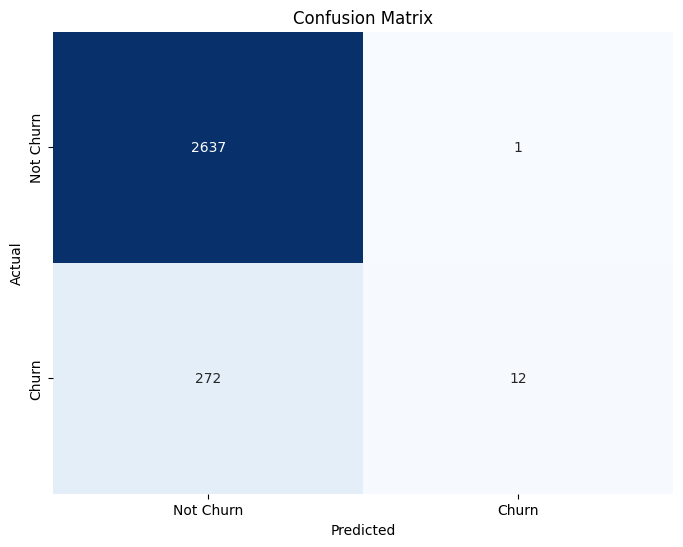

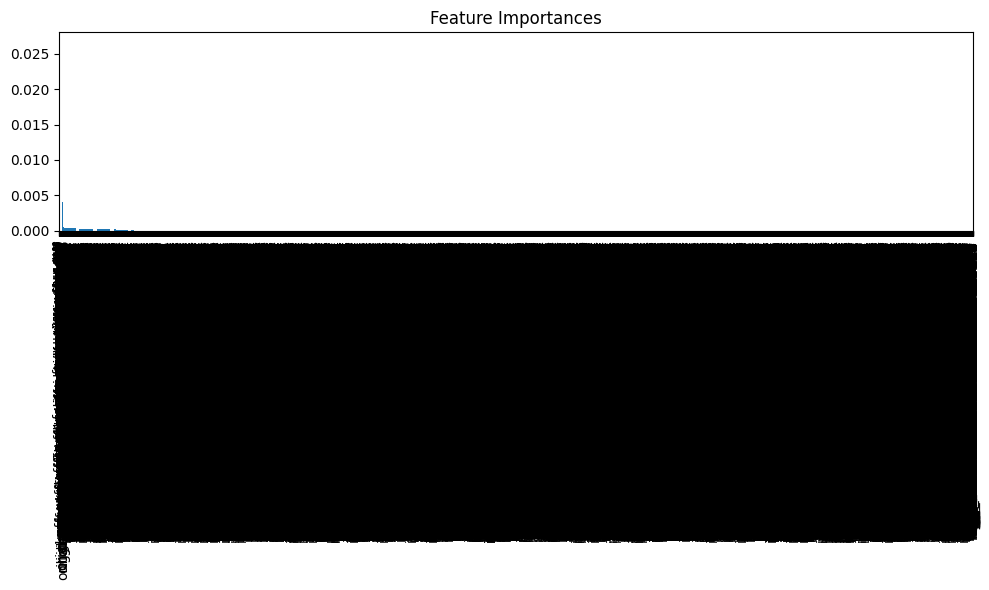

Feature ranking:
1. feature margin_gross_pow_ele (0.0267)
2. feature margin_net_pow_ele (0.0250)
3. feature forecast_meter_rent_12m (0.0248)
4. feature log_cons_12m (0.0247)
5. feature net_margin (0.0247)
6. feature cons_forecast_diff (0.0245)
7. feature cons_12m (0.0244)
8. feature Unnamed: 0 (0.0240)
9. feature forecast_cons_12m (0.0238)
10. feature cons_last_month (0.0193)
11. feature pow_max (0.0191)
12. feature var_year_price_off_peak (0.0179)
13. feature var_year_price_off_peak_var (0.0176)
14. feature imp_cons (0.0173)
15. feature months_modif_prod (0.0173)
16. feature months_activ (0.0171)
17. feature off_peak_peak_var_mean_diff (0.0160)
18. feature off_peak_mid_peak_var_mean_diff (0.0159)
19. feature offpeak_diff_dec_january_energy (0.0153)
20. feature var_year_price_off_peak_fix (0.0144)
21. feature forecast_price_energy_off_peak (0.0139)
22. feature var_6m_price_off_peak_var (0.0125)
23. feature var_6m_price_off_peak (0.0125)
24. feature off_peak_mid_peak_var_max_monthly_dif

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")

# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature importances
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f+1}. feature {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")

## Summary:

### Q&A
No questions were posed in the provided data analysis task.

### Data Analysis Key Findings
* **No Missing Values:**  The dataset initially showed no missing values, but this was double-checked after data cleaning, confirming the absence of missing data.
* **Outlier Handling:** Outliers in numerical features (e.g., 'cons\_12m', 'cons\_gas\_12m') were addressed using the Interquartile Range (IQR) method.
* **Feature Engineering Impact:** Newly engineered features demonstrated weak correlations with the target variable 'churn', suggesting they might have limited predictive power individually. The most impactful engineered feature was 'sqrt\_tenure' with a correlation of -0.080 with churn.
* **Model Performance:** The Random Forest Classifier achieved an accuracy of 0.9066, precision of 0.9231, recall of 0.0423, F1-score of 0.0808, and AUC-ROC of 0.6823.  The low recall indicates the model struggles to identify positive cases (churn).
* **Feature Importance:** 'margin\_gross\_pow\_ele' emerged as the most important feature in the Random Forest model.

### Insights or Next Steps
* **Investigate Class Imbalance:** The low recall suggests a potential class imbalance problem in the 'churn' variable. Techniques like oversampling the minority class or using class weights during model training should be explored.
* **Hyperparameter Tuning:**  The Random Forest model used default hyperparameters.  Tuning these parameters (e.g., `n_estimators`, `max_depth`, `min_samples_split`) could improve model performance, particularly focusing on improving recall.
